In [ ]:
! pip install -q kaggle

In [ ]:
#import os
#os.environ["KAGGLE_CONFIG_DIR"] = r'C:\\Users\\Dell\\.kaggle\\kaggle.json'

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhamsodanwar","key":"41917127826a24c6da17434767c9399b"}'}

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 81.9MB/s]
100% 15.3M/15.3M [00:00<00:00, 114MB/s] 


In [5]:
! unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
# Import datasets
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [8]:
train.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40640,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37557,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32403,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31013,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing and EDA

In [10]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


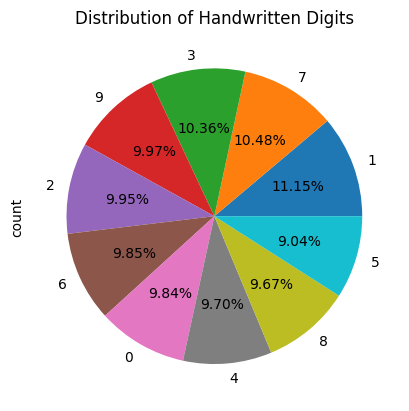

In [12]:
#plot pie chat
train['label'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Distribution of Handwritten Digits')
plt.show()

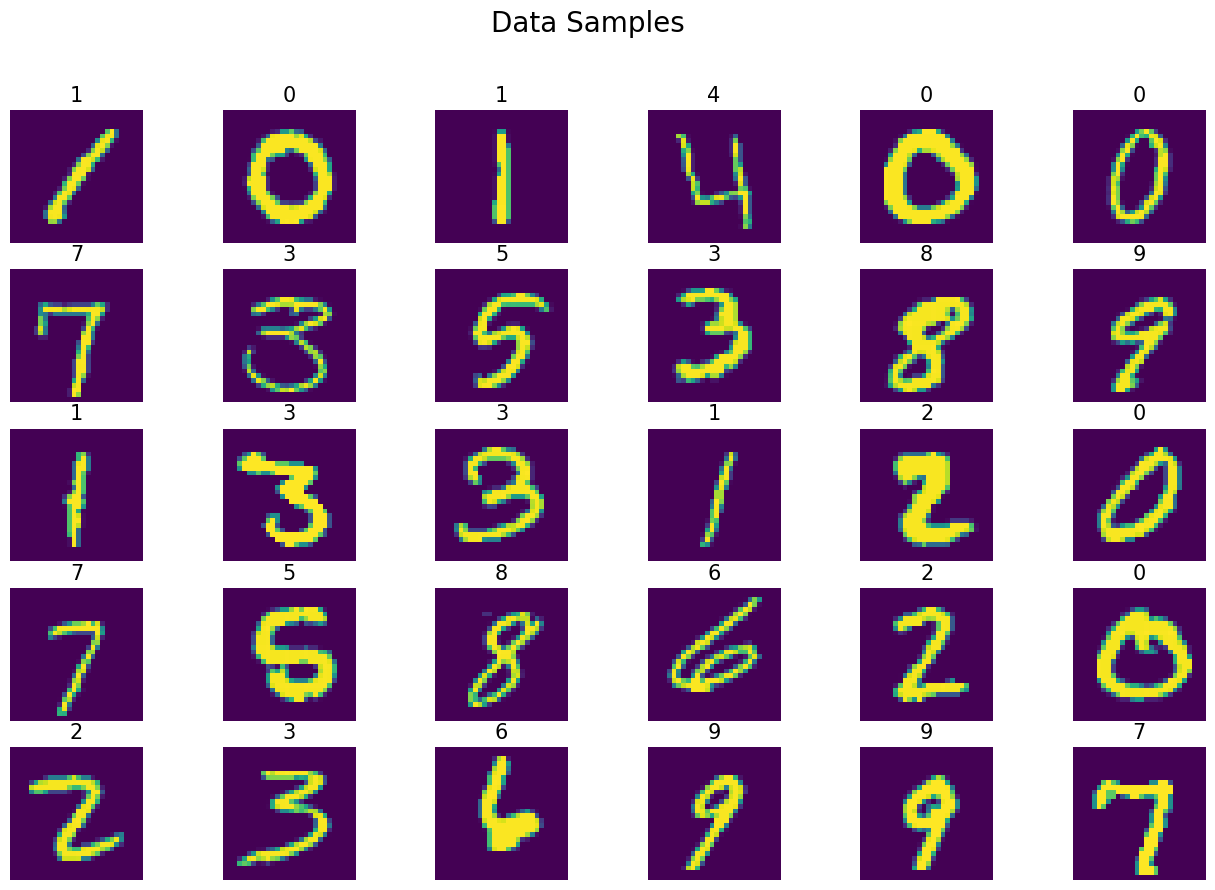

In [13]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(16,10))

i = 0
for row in range(5):
  for col in range(6):
    axs[row][col].imshow(train.iloc[i, 1:].values.reshape(28,28), cmap='viridis')
    axs[row][col].set_title(str(train.iloc[i, 0]), fontsize=15)
    axs[row][col].axis('off')
    i+=1

plt.suptitle('Data Samples', fontsize=20)
plt.show()

In [14]:
#Splitting the data
y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis = 1).astype('float32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

In [15]:
#reshape and covert pixel values 0 to 1 range
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_train = X_train / 255
X_test = X_test.values.reshape(-1, 28, 28, 1)
X_test = X_test / 255
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [16]:
#one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_train.shape

(42000, 10)

In [17]:
print(train['label'].head())

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


In [18]:
print(y_train[0:5, :])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),

    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation ='relu'),
    tf.keras.layers.Dense(256, activation ='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation ='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,922 (1.35 MB)

 Trainable params: 354,922 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
Optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.0005,
    name = 'Adam'
)

In [21]:
model.compile(optimizer = Optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history=model.fit(X_train, y_train, batch_size = 50, epochs = 10, validation_split=0.2)

Epoch 1/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 144s 207ms/step - accuracy: 0.7022 - loss: 0.8306 - val_accuracy: 0.9754 - val_loss: 0.0857
Epoch 2/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 137s 199ms/step - accuracy: 0.9695 - loss: 0.1081 - val_accuracy: 0.9842 - val_loss: 0.0490
Epoch 3/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 139s 195ms/step - accuracy: 0.9809 - loss: 0.0672 - val_accuracy: 0.9846 - val_loss: 0.0493
Epoch 4/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 140s 193ms/step - accuracy: 0.9844 - loss: 0.0555 - val_accuracy: 0.9896 - val_loss: 0.0396
Epoch 5/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 142s 193ms/step - accuracy: 0.9871 - loss: 0.0428 - val_accuracy: 0.9894 - val_loss: 0.0420
Epoch 6/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 138s 187ms/step - accuracy: 0.9892 - loss: 0.0338 - val_accuracy: 0.9920 - val_loss: 0.0294
Epoch 7/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 129s 191ms/step - accuracy: 0.9893 - loss: 0.0347 - val_accuracy: 0.9908 - val_loss: 0.0374
Epoch 8/10
672/672 ━━━━━━━━━━━━━━━━━━━━ 144s 194ms/step - accuracy: 0.9914 -

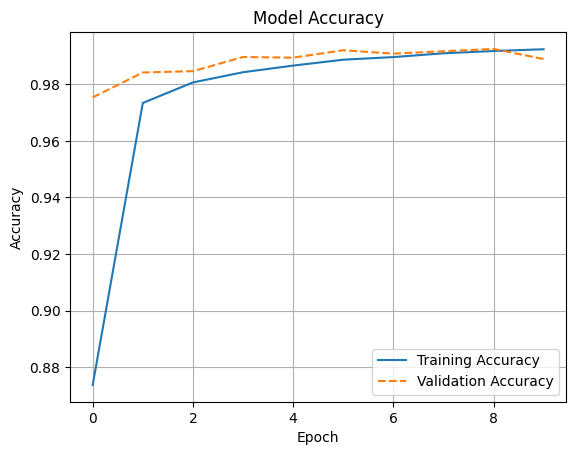

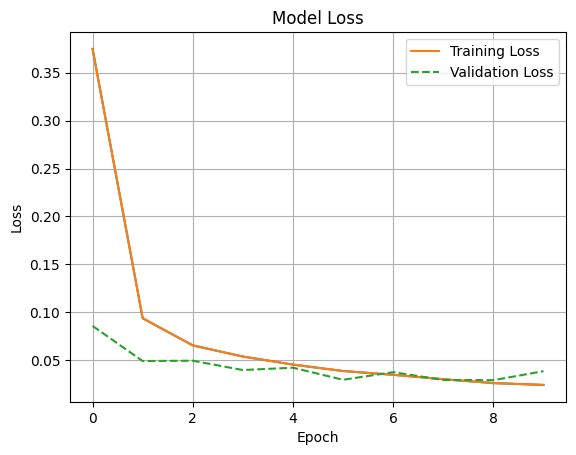

In [22]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
results = model.predict(X_test)
results = np.argmax(results, axis = 1)
results = pd.Series(results, name = 'Label')

875/875 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step


In [27]:
submission = pd.concat([pd.Series(range(1, 28001), name = 'ImageId'), results], axis = 1)
submission.to_csv('digitrecognizer.csv', index = False)